In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("HR Dataset.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# Descriptive Analysis

In [3]:
def descriptive_analysis():
    information = df.info()
    description = df.describe()
    return information,description

descriptive_analysis()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


(None,
         employee_id  no_of_trainings           age  previous_year_rating  \
 count  54808.000000     54808.000000  54808.000000          50684.000000   
 mean   39195.830627         1.253011     34.803915              3.329256   
 std    22586.581449         0.609264      7.660169              1.259993   
 min        1.000000         1.000000     20.000000              1.000000   
 25%    19669.750000         1.000000     29.000000              3.000000   
 50%    39225.500000         1.000000     33.000000              3.000000   
 75%    58730.500000         1.000000     39.000000              4.000000   
 max    78298.000000        10.000000     60.000000              5.000000   
 
        length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
 count       54808.000000   54808.000000  54808.000000        54808.000000   
 mean            5.865512       0.351974      0.023172           63.386750   
 std             4.265094       0.477590      0.150450          

# Getting Missing Data

check duplicates 
 0 

check missing value 
 employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64 

missing data 
                 feature  missing_value  percentage_of_missing_value
0             education           2409                         4.40
1  previous_year_rating           4124                         7.52 



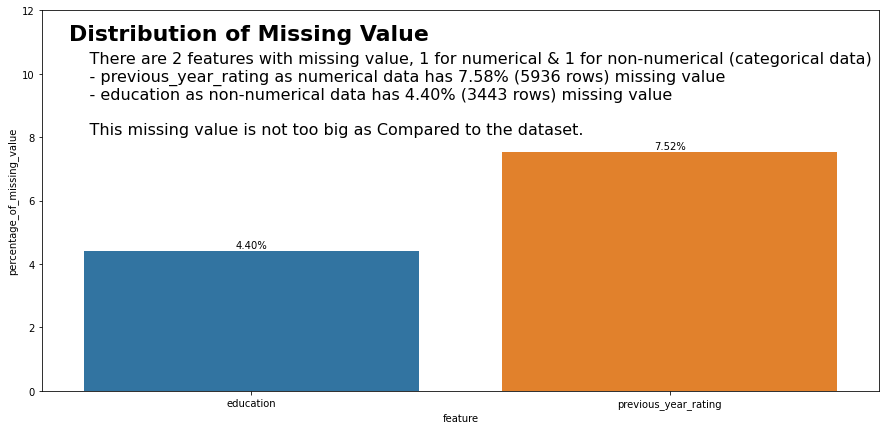

In [6]:
def missing_data():
    print("check duplicates \n",df.duplicated().sum(),"\n")
    print("check missing value \n",df.isna().sum(),"\n")
    #analysing missing data
    missing_data = df.isnull().sum().reset_index()
    missing_data.columns = ['feature','missing_value']
    missing_data = missing_data[missing_data['missing_value']>0].reset_index(drop = True)
    missing_data['percentage_of_missing_value'] = round((missing_data['missing_value']/len(df))*100,2)
    print("missing data \n",missing_data,"\n")
    
    ##plot missing data
    fig, ax = plt.subplots(figsize = (15,7))
    md_plot = sns.barplot(x='feature', y='percentage_of_missing_value', data = missing_data)
    ax.set_ylim(0,12)
 
    for i in md_plot.patches:
        height = i.get_height()
        md_plot.text(x = i.get_x() + (i.get_width()/2),
                y = height + 0.1,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center')
        
    title = '''Distribution of Missing Value'''

    fig.text(x=0.150, y=0.82, s = title, fontsize = 22, weight = 'bold')
    text = '''
    There are 2 features with missing value, 1 for numerical & 1 for non-numerical (categorical data)
    - previous_year_rating as numerical data has 7.58% (5936 rows) missing value
    - education as non-numerical data has 4.40% (3443 rows) missing value

    This missing value is not too big as Compared to the dataset.
    '''
    fig.text(x=0.150, y=0.60, s = text, fontsize=16)
    

missing_data()

# Cleaning of data

In [ ]:
def cleaning_data():
    global df
    
    ## cleaning the data 
    df = df.copy()
    df['education'] = df['education'].fillna(df['education'].mode()[0])
    df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
    
    # after cleaning 
    print("check duplicates \n",df.duplicated().sum(),"\n")
    print("check missing value \n",df.isna().sum(),"\n")
    
cleaning_data()

# Outlier Analysis

In [ ]:
px.box(df.drop(['employee_id','department','region','education','gender','recruitment_channel'],axis=1)).show()

In [ ]:
i='length_of_service'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

In [ ]:
i='age'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

## Q1. Does winning awards for the company have an added advantage for getting promoted?

In [ ]:
#winning awards
data_awards = pd.pivot_table(df,
                index = ['awards_won?'],
                columns = ['is_promoted'],
                aggfunc = {'is_promoted' : ['count']}).reset_index()
data_awards.columns = ['awards_won', 'not_promoted', 'promoted']
data_awards['total'] = data_awards['not_promoted']+data_awards['promoted']
data_awards['probability'] = round((data_awards['promoted']/data_awards['total'])*100,2)
data_awards = data_awards.sort_values(['probability'], ascending=False)
print(data_awards)

fig, ax = plt.subplots(figsize = (15,10))
cols = ['darkorange' if x < 10 else 'steelblue' for x in data_awards.probability]
g = sns.barplot(x='awards_won', y='probability', 
                data=data_awards,ax=ax,palette=cols,
               order=data_awards.sort_values('probability',ascending = False).awards_won)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')

plt.xticks(rotation=0)

#add title
title = '''Promotion by Awards Won'''
fig.text(x=0.50, y=0.8, s=title, fontsize=24, weight='bold')

#add description
text = '''
Employees who have won an award 
have a 33.57% chance of being promoted
while those who have never won an award
only have a probability of 7.91%.
'''
fig.text(x=0.50, y=0.575, s=text, fontsize=20)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('awards won', fontsize = 20, weight='bold')
plt.ylabel('probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Awarded', 'Not Awarded'], fontsize = 18)


## Q2. Does previous years rating affects in getting promoted.

In [ ]:
#previous year rating

data_ratings = pd.pivot_table(df,
                index = ['previous_year_rating'],
                columns = ['is_promoted'],
                aggfunc = {'is_promoted' : ['count']}).reset_index()
data_ratings.columns = ['rating_based_on_previous_year', 'not_promoted', 'promoted']
data_ratings['total'] = data_ratings['not_promoted']+data_ratings['promoted']
data_ratings['probability'] = round((data_ratings['promoted']/data_ratings['total'])*100,2)
data_ratings = data_ratings.sort_values(['probability'], ascending=False)
print(data_ratings)

fig, ax = plt.subplots(figsize = (15,11))

g = sns.barplot(x='rating_based_on_previous_year', y='probability', 
                data=data_ratings,ax=ax,palette='GnBu_d',
               order=data_ratings.sort_values('probability').rating_based_on_previous_year)


#add title
for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.1,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center',
           fontsize=18
          )

title = '''
Promotion by Previous Year Rating :
'''

text = '''
Employees who have a rating of 5 have the greatest 
chance of getting a promotion, which is 13.94% of getting a promotion. Inshort,
Higher the rating , higher the chances of getting promoted
'''

#plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Previous Year Rating (1 to 5)', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0, y = 13, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 11, s=text,
        fontsize = 16, alpha = .85)


## Q3. What is the probability of getting promoted based on Kpi?.

In [ ]:
#probability of getting promoted based on Kpi 

data_Kpi = pd.pivot_table(df,
                index = ['KPIs_met >80%'],
                columns = ['is_promoted'],
                aggfunc = {'is_promoted' : ['count']}).reset_index()
data_Kpi.columns = ['Kpi', 'not_promoted', 'promoted']
data_Kpi['total'] = data_Kpi['not_promoted']+data_Kpi['promoted']
data_Kpi['probability'] = round((data_Kpi['promoted']/data_Kpi['total'])*100,2)
data_Kpi = data_Kpi.sort_values(['probability'], ascending=False)
print(data_Kpi)

fig, ax = plt.subplots(figsize = (15,11))
cols = ['red' if x < 10 else 'green' for x in data_awards.probability]
g = sns.barplot(x='Kpi', y='probability', 
                data=data_Kpi,ax=ax,palette=cols,
               order=data_Kpi.sort_values('probability',ascending = False).Kpi)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.2,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=18,
                weight='bold')

plt.xticks(rotation=0)

#add title
title = '''Promotion by Key Performance Indicator :'''
fig.text(x=0.52, y=0.80, s=title, fontsize=20, weight='bold')

#add description
text = '''
Employees who achieve KPIs of 
more than 80% have a 14.30% 
chance of getting a promotion
'''
fig.text(x=0.54, y=0.65, s=text, fontsize=18)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Key Performance Indicator', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['More than 80%', 'Less than 80%'], fontsize = 18)




## Q4. Can a person's education affect their "avg training score" and chances of promotion

In [ ]:
data_education = pd.pivot_table(df,
                    index = ['education'],
                    columns = ['is_promoted'],
                    aggfunc = {'is_promoted' : ['count']}).reset_index()
data_education.columns = ['education', 'not_promoted', 'promoted']
data_education['total'] = data_education['not_promoted']+data_education['promoted']
data_education['probability'] = round((data_education['promoted']/data_education['total'])*100,2)
data_education = data_education.sort_values(['probability'], ascending=False)
print(data_education)

fig, ax = plt.subplots(figsize = (15,11))

g = sns.barplot(x='education', y='probability', 
                data=data_education,ax=ax,palette='GnBu_d',
               order=data_education.sort_values('probability').education)


for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.1,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=16,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Promotion by Education Level'''
fig.text(x=0.20, y=0.85, s=title, fontsize=20, weight='bold')

#add description
text = '''
Employees with a master's education level
and above have a chance to be promoted by 9.55%
'''
fig.text(x=0.20, y=0.76, s=text, fontsize=16)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Education Level', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Below Secondary', "Bachelor's", "Master's & Above"], fontsize = 18)



## Extra -- Does a department's importance in promotion play a part?

In [ ]:
data_department = pd.pivot_table(df,
                    index = ['department'],
                    columns = ['is_promoted'],
                    aggfunc = {'is_promoted' : ['count']}).reset_index()
data_department.columns = ['department', 'not_promoted', 'promoted']
data_department['total'] = data_department['not_promoted']+data_department['promoted']
data_department['probability'] = round((data_department['promoted']/data_department['total'])*100,2)
data_department = data_department.sort_values(['probability'], ascending=False)
print(data_department)

fig, ax = plt.subplots(figsize = (15,11))

g = sns.barplot(x='department', y='probability', 
                data=data_department,ax=ax,palette='GnBu_d',
               order=data_department.sort_values('probability').department)



for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.1,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=16,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Promotion by Department :'''
fig.text(x=0.16, y=0.825, s=title, fontsize=20, weight='bold')

#add description
text = '''
employees from the technology department have 
the greatest chance with a probability value 
of 10.15% to be promoted, while employees from
the legal department have the least chance 
with a probability value of 6%
'''
fig.text(x=0.20, y=0.69, s=text, fontsize=15)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Department', fontsize = 20, weight='bold')
plt.ylabel('probability', fontsize = 20, weight='bold')



## Q7. How can we increase the prospects for professional growth inside our company and use data analytics to find individuals who may be qualified for promotion but haven't yet been approved for it?

In [ ]:
df['hs'] = np.where(df['avg_training_score']>=90, 1, 0)
prob_tk = df.groupby(['hs','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
tk = prob_tk.pivot_table(index=['hs','KPIs_met >80%'], columns='is_promoted', 
                       values='employee_id').reset_index()
tk.columns = ['high_score', 'kpi', 'not_promoted','promoted']
tk['total'] = tk['not_promoted']+tk['promoted']
tk['probability'] = round((tk['promoted']/tk['total'])*100,2)
tk['kpi'] = np.where(tk['kpi']==0, '<80%', '>80%')
print(tk)

fig, ax1 = plt.subplots(figsize = (15,11))

g = sns.barplot(x='high_score', y='probability', hue='kpi',
                data=tk,ax=ax1,palette='muted')

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Promotion by Average Training Score and KPI'''
fig.text(x=0.34, y=0.65, s=title, fontsize=18, weight='bold',ha='center')

#add description
text = '''
Employees who have an average training score 
of more than equal to 90 have a greater chance
of being promoted than employees whose average 
training scoreis less than 90 even though they 
have achieved a KPI of more than 80%
'''
fig.text(x=0.35, y=0.49, s=text, fontsize=16,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Average Training Score', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Training Score <90', 'Training Score >=90'], fontsize = 18)

# Correlation Plot

In [ ]:
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
corr_= df[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [ ]:
def data_preparation():
    global df_model
    #dropping unecessary columns
    df_model = df.drop(['employee_id'], axis=1)
    
    le=LabelEncoder()

    label=le.fit_transform(df_model['department'])
    label
    df_model.drop('department',axis=1)
    df_model['department']=label

    label2=le.fit_transform(df_model['education'])
    label2
    df_model.drop('education',axis=1)
    df_model['education']=label2
  
    label3=le.fit_transform(df_model['region'])
    label3
    df_model.drop('region',axis=1)
    df_model['region']=label3

    label4=le.fit_transform(df_model['gender'])
    label4
    df_model.drop('gender',axis=1)
    df_model['gender']=label4

    label5=le.fit_transform(df_model['recruitment_channel'])
    label5
    df_model.drop('recruitment_channel',axis=1)
    df_model['recruitment_channel']=label5


    df_model['avg_training_score'] = np.where(df_model['avg_training_score']>=85, 1, 0)
    print("\n\n AFTER LABEL ENCODING \n\n")
    print(df_model.info())

    scaler = MinMaxScaler()
    df_model = pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
    print("\n\n AFTER Scaling \n\n")
    print(df_model.head())
    
    #finding important variable for our dataset
    X = df_model.drop('is_promoted', axis = 1)   
    y = df_model[['is_promoted']]  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=df_model.is_promoted)

    from sklearn.feature_selection import mutual_info_classif
    mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

    plt.subplots(1, figsize=(26, 1))
    g= sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
    plt.yticks([], [])
    plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
    plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
    plt.gcf().subplots_adjust(wspace=0.2)
    g
    
    #dropping the features not required
    df_model = df_model.drop(['department','region','education','gender','recruitment_channel'
                   ,'no_of_trainings','age','length_of_service'], axis=1)
    print("\n\n Selecting the important features \n\n")
    print(df_model.info())

data_preparation()